In [28]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers.csv")

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.400000
std,57.879185,13.969007,26.264721,25.823522,1.449311
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


# **Data Cleaning**

In [32]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [33]:
df.duplicated().sum()

np.int64(0)

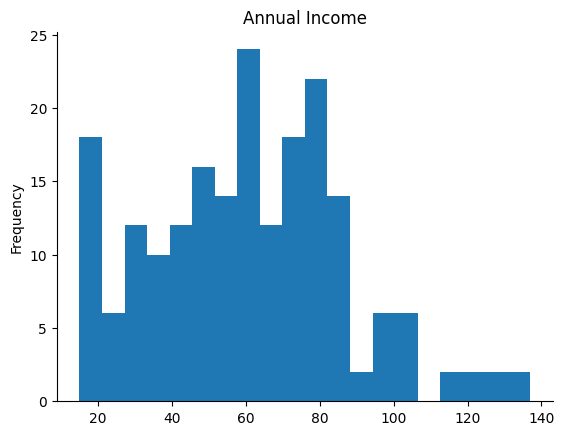

In [42]:
import matplotlib.pyplot as plt
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

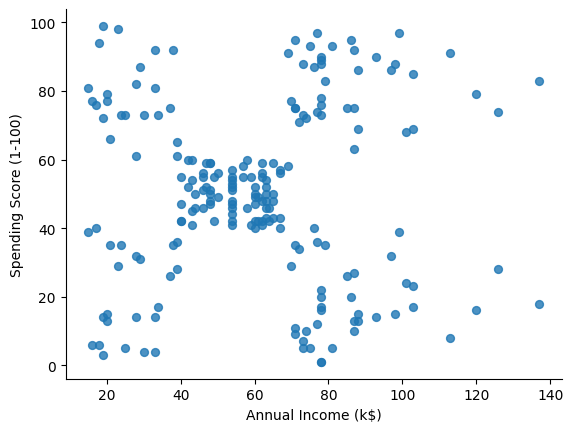

In [46]:
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Buliding Model**

In [35]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]



In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

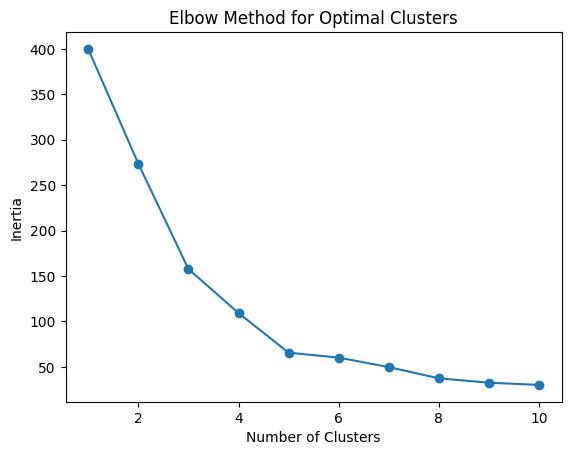

In [38]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

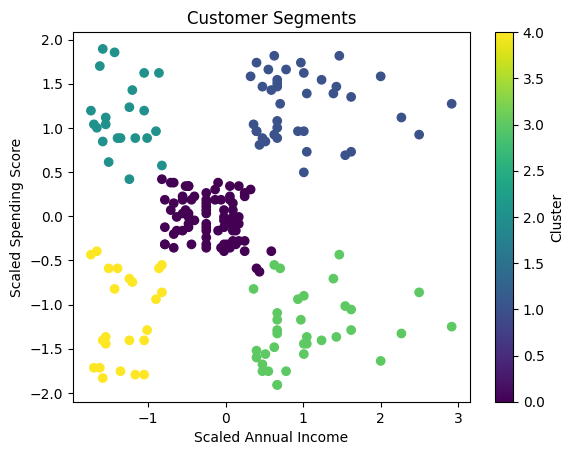

In [40]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.show()